# Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading the data from the CSV

In [4]:
excel_df = pd.read_excel('orders_data.xlsx')
excel_df

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
0,2c06175e,0001328c3c220830,2020-12-24 00:00:00,2020-12-13,Nintendo Switch,e682,168.00,website,affiliate,unknown,US
1,ee8e5bc2,0002af7a5c6100772,2020-10-01 00:00:00,2020-09-21,Nintendo Switch,e682,160.61,website,direct,desktop,DE
2,9eb4efe0,0002b8350e167074,2020-04-21 00:00:00,2020-02-16,Nintendo Switch,8d0d,151.20,website,direct,desktop,US
3,cac7cbaf,0006d06b98385729,2020-04-07 00:00:00,2020-04-04,Sony PlayStation 5 Bundle,54ed,1132.82,website,direct,desktop,AU
4,6b0230bc,00097279a2f46150,2020-11-24 00:00:00,2020-08-02,Nintendo Switch,8d0d,33.89,website,direct,desktop,TR
...,...,...,...,...,...,...,...,...,...,...,...
21859,e432cf6f,fff0b6a1e9996384,2019-11-27 00:00:00,2019-11-29,Sony PlayStation 5 Bundle,54ed,1527.06,website,direct,desktop,US
21860,f4f11c04,fff4592dc6d103535,2019-12-23 00:00:00,2019-12-26,27in 4K gaming monitor,891b,467.88,website,direct,desktop,US
21861,f4f11c04,fff4592dc6d103537,2019-12-23 00:00:00,2019-12-26,27in 4K gaming monitor,891b,467.88,website,direct,desktop,US
21862,203ce4dd,fff829b061e16171,2021-01-31 00:00:00,2021-02-02,Dell Gaming Mouse,8d4f,67.07,mobile app,direct,desktop,GB


# Displaying the first 5 rows of the DataFrame

In [6]:
excel_df.head()

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
0,2c06175e,0001328c3c220830,2020-12-24 00:00:00,2020-12-13,Nintendo Switch,e682,168.00,website,affiliate,unknown,US
1,ee8e5bc2,0002af7a5c6100772,2020-10-01 00:00:00,2020-09-21,Nintendo Switch,e682,160.61,website,direct,desktop,DE
2,9eb4efe0,0002b8350e167074,2020-04-21 00:00:00,2020-02-16,Nintendo Switch,8d0d,151.20,website,direct,desktop,US
3,cac7cbaf,0006d06b98385729,2020-04-07 00:00:00,2020-04-04,Sony PlayStation 5 Bundle,54ed,1132.82,website,direct,desktop,AU
4,6b0230bc,00097279a2f46150,2020-11-24 00:00:00,2020-08-02,Nintendo Switch,8d0d,33.89,website,direct,desktop,TR


# Displaying the number of rows and columns in the DataFrame

In [8]:
rows, cols = excel_df.shape

In [9]:
print(f"Number of Rows    : \033[1m{rows: ,}\033[0m")
print(f"Number of Columns : \033[1m{cols: ,}\033[0m")

Number of Rows    :  21,864
Number of Columns :  11


# Displaying the details of the DataFrame like - data types, non-null columns, memory usage and so on.

In [11]:
excel_df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   USER_ID                  21864 non-null  object        
 1   ORDER_ID                 21864 non-null  object        
 2   PURCHASE_TS              21864 non-null  object        
 3   SHIP_TS                  21864 non-null  datetime64[ns]
 4   PRODUCT_NAME             21864 non-null  object        
 5   PRODUCT_ID               21864 non-null  object        
 6   USD_PRICE                21859 non-null  float64       
 7   PURCHASE_PLATFORM        21864 non-null  object        
 8   MARKETING_CHANNEL        21781 non-null  object        
 9   ACCOUNT_CREATION_METHOD  21781 non-null  object        
 10  COUNTRY_CODE             21826 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 11.1 MB


# Displaying the data types of the columns.

In [13]:
excel_df.dtypes

USER_ID                            object
ORDER_ID                           object
PURCHASE_TS                        object
SHIP_TS                    datetime64[ns]
PRODUCT_NAME                       object
PRODUCT_ID                         object
USD_PRICE                         float64
PURCHASE_PLATFORM                  object
MARKETING_CHANNEL                  object
ACCOUNT_CREATION_METHOD            object
COUNTRY_CODE                       object
dtype: object

# Displaying the 5-Number Summary of the Numeric-columns.

In [15]:
excel_df.describe(include = np.number).loc['min': 'max'].T.round(2)

,min,25%,50%,75%,max
USD_PRICE,0.0,126.0,168.0,357.0,3146.88


# Checking for missing values (NaN values).

In [17]:
total_missing_values = excel_df.isnull().sum().sum()
print(f"Total Missing Values: \033[1m{total_missing_values: ,}\033[0m")

Total Missing Values:  209


In [18]:
nan_cols = excel_df.isnull().sum()
nan_cols = nan_cols[nan_cols > 0]

In [19]:
print("\033[1mFollowing are the columns with NaN or Missing Values:\033[0m\n")
print(nan_cols)

Following are the columns with NaN or Missing Values:

USD_PRICE                   5
MARKETING_CHANNEL          83
ACCOUNT_CREATION_METHOD    83
COUNTRY_CODE               38
dtype: int64


In [20]:
nan_cols.index.to_list()

['USD_PRICE', 'MARKETING_CHANNEL', 'ACCOUNT_CREATION_METHOD', 'COUNTRY_CODE']

In [21]:
excel_df[excel_df['USD_PRICE'].isnull()]

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
1190,f2939b5c,0fa89eecc5d102514,2020-08-20 00:00:00,2020-05-26,Dell Gaming Mouse,0c5a,NaN,mobile app,email,desktop,GH
13282,45913313,ab0b1a9c91a1197,2019-12-25 00:00:00,2019-12-28,JBL Quantum 100 Gaming Headset,2997,NaN,mobile app,email,mobile,KE
14189,1c173578,b6a132d331c14466,2020-09-01 00:00:00,2020-09-04,Dell Gaming Mouse,f81e,NaN,mobile app,direct,desktop,KE
20044,7c364c50,eee5663869153075,2020-07-11 00:00:00,2020-07-12,Dell Gaming Mouse,f81e,NaN,mobile app,email,mobile,VE
20227,70565cdf,f063ed5ec8848400,2021-01-08 00:00:00,2021-01-10,Dell Gaming Mouse,f81e,NaN,mobile app,email,desktop,BO


**As you can see these are the rows with the missing values for the 'USD_PRICE' column**

We can handle these missing values by replacing the mean value of this column for those missing values.

In [23]:
print(excel_df['USD_PRICE'].mean().round(2))

281.41


In [24]:
excel_df['USD_PRICE'] = excel_df['USD_PRICE'].fillna(excel_df['USD_PRICE'].mean().round(2))

#### As the other columns are categorical columns we can keep those columns with the NaN values.

# Check or duplicates in the DataFrames.

In [27]:
excel_df.duplicated().sum()

np.int64(35)

In [28]:
excel_df[excel_df.duplicated()]

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
9379,b66cdb8d,7a5f67e18fa77291,2020-01-27 00:00:00,2020-01-28,27in 4K gaming monitor,e7e6,480.00,website,direct,desktop,US
9564,6270d6f9,7d09de332e342684,2020-01-27 00:00:00,2020-01-30,27in 4K gaming monitor,891b,332.20,website,direct,desktop,BR
10052,3838f9e6,833086c869925765,2020-01-24 00:00:00,2020-01-25,27in 4K gaming monitor,891b,317.14,website,direct,desktop,JP
10142,fd7dd923,844a97334cd107082,2020-01-22 00:00:00,2020-01-25,27in 4K gaming monitor,891b,480.00,website,direct,desktop,US
11029,515bfd3a,8f17d3f0be035984,2020-01-23 00:00:00,2020-01-25,27in 4K gaming monitor,891b,480.00,website,direct,mobile,US
11224,92250a0e,91ac9f734b261993,2020-01-22 00:00:00,2020-01-24,27in 4K gaming monitor,891b,480.00,website,direct,mobile,US
12447,d8649c7b,a170b9765e691428,2020-01-20 00:00:00,2020-01-23,27in 4K gaming monitor,e7e6,480.00,website,direct,mobile,US
12688,c466caab,a4423107e2e83156,2020-01-27 00:00:00,2020-01-30,27in 4K gaming monitor,891b,242.19,website,direct,mobile,MX
12758,5ec77880,a4d2df47bbd41301,2020-01-29 00:00:00,2020-01-31,27in 4K gaming monitor,891b,384.00,website,direct,mobile,US
12889,341f7162,a6a25e392b124142,2020-01-23 00:00:00,2020-01-26,27in 4K gaming monitor,891b,431.41,website,direct,mobile,JP


In [29]:
excel_df[excel_df['USER_ID'] == 'b66cdb8d']

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
9378,b66cdb8d,7a5f67e18fa77291,2020-01-27 00:00:00,2020-01-28,27in 4K gaming monitor,e7e6,480.0,website,direct,desktop,US
9379,b66cdb8d,7a5f67e18fa77291,2020-01-27 00:00:00,2020-01-28,27in 4K gaming monitor,e7e6,480.0,website,direct,desktop,US


In [30]:
excel_df[excel_df['USER_ID'] == 'b7dc3969']

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
14320,b7dc3969,b7f9941a1a277888,2020-01-23 00:00:00,2020-01-24,27in 4K gaming monitor,891b,288.61,website,direct,desktop,DE
14321,b7dc3969,b7f9941a1a277888,2020-01-23 00:00:00,2020-01-24,27in 4K gaming monitor,891b,288.61,website,direct,desktop,DE
21592,b7dc3969,fdab3702c4b77889,2019-10-26 00:00:00,2019-10-27,Nintendo Switch,e682,149.70,website,direct,desktop,DE


In [31]:
excel_df.drop_duplicates(keep = 'first', inplace = True)

In [32]:
print(excel_df.duplicated().sum())

0


#### We removed the duplicate rows from the DataFrame by keeping the first record which is treated as a non-duplicate row.

In [34]:
excel_df.dtypes

USER_ID                            object
ORDER_ID                           object
PURCHASE_TS                        object
SHIP_TS                    datetime64[ns]
PRODUCT_NAME                       object
PRODUCT_ID                         object
USD_PRICE                         float64
PURCHASE_PLATFORM                  object
MARKETING_CHANNEL                  object
ACCOUNT_CREATION_METHOD            object
COUNTRY_CODE                       object
dtype: object

In [35]:
excel_df.head()

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
0,2c06175e,0001328c3c220830,2020-12-24 00:00:00,2020-12-13,Nintendo Switch,e682,168.00,website,affiliate,unknown,US
1,ee8e5bc2,0002af7a5c6100772,2020-10-01 00:00:00,2020-09-21,Nintendo Switch,e682,160.61,website,direct,desktop,DE
2,9eb4efe0,0002b8350e167074,2020-04-21 00:00:00,2020-02-16,Nintendo Switch,8d0d,151.20,website,direct,desktop,US
3,cac7cbaf,0006d06b98385729,2020-04-07 00:00:00,2020-04-04,Sony PlayStation 5 Bundle,54ed,1132.82,website,direct,desktop,AU
4,6b0230bc,00097279a2f46150,2020-11-24 00:00:00,2020-08-02,Nintendo Switch,8d0d,33.89,website,direct,desktop,TR


# Casting columns to appropriate data types where applicable.

In [37]:
excel_df['PURCHASE_TS'] = pd.to_datetime(excel_df['PURCHASE_TS'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [38]:
excel_df.dtypes

USER_ID                            object
ORDER_ID                           object
PURCHASE_TS                datetime64[ns]
SHIP_TS                    datetime64[ns]
PRODUCT_NAME                       object
PRODUCT_ID                         object
USD_PRICE                         float64
PURCHASE_PLATFORM                  object
MARKETING_CHANNEL                  object
ACCOUNT_CREATION_METHOD            object
COUNTRY_CODE                       object
dtype: object

In [39]:
excel_df.head(2)

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
0,2c06175e,0001328c3c220830,2020-12-24,2020-12-13,Nintendo Switch,e682,168.00,website,affiliate,unknown,US
1,ee8e5bc2,0002af7a5c6100772,2020-10-01,2020-09-21,Nintendo Switch,e682,160.61,website,direct,desktop,DE


# Group the data to uncover patterns

<Axes: ylabel='PRODUCT_NAME'>

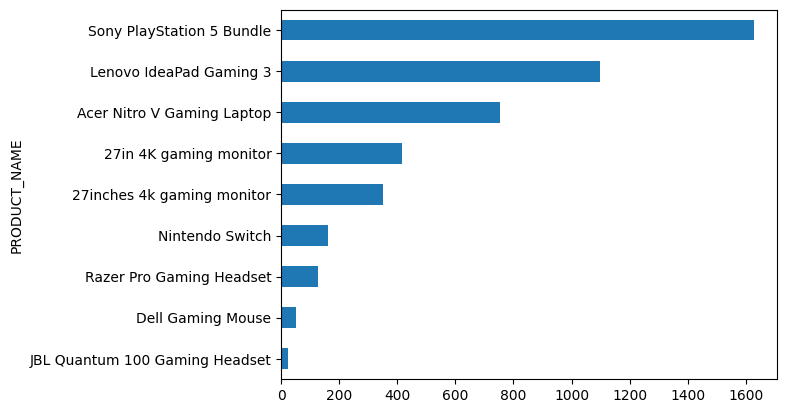

In [41]:
excel_df.groupby('PRODUCT_NAME')['USD_PRICE'].mean().sort_values().plot(kind = 'barh')

# Data Visualization on the DataFrame

In [43]:
excel_df.head(3)

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
0,2c06175e,0001328c3c220830,2020-12-24,2020-12-13,Nintendo Switch,e682,168.00,website,affiliate,unknown,US
1,ee8e5bc2,0002af7a5c6100772,2020-10-01,2020-09-21,Nintendo Switch,e682,160.61,website,direct,desktop,DE
2,9eb4efe0,0002b8350e167074,2020-04-21,2020-02-16,Nintendo Switch,8d0d,151.20,website,direct,desktop,US


In [44]:
non_numeric_columns = excel_df.select_dtypes(exclude= np.number).columns[2:].to_list()
numeric_columns = excel_df.select_dtypes(include=np.number).columns.to_list()

In [45]:
print(f"Non-Numeric Columns: \033[1m{non_numeric_columns}\033[0m")
print(f"Numeric Columns: \033[1m{numeric_columns}\033[0m")

Non-Numeric Columns: ['PURCHASE_TS', 'SHIP_TS', 'PRODUCT_NAME', 'PRODUCT_ID', 'PURCHASE_PLATFORM', 'MARKETING_CHANNEL', 'ACCOUNT_CREATION_METHOD', 'COUNTRY_CODE']
Numeric Columns: ['USD_PRICE']


# Bar charts

In [295]:
# Horizontal Bar Plot - Product-wise Revenue from Orders

total_sales_by_products = excel_df.groupby('PRODUCT_NAME')['USD_PRICE'].sum().round(0).reset_index().sort_values(by='USD_PRICE', ascending = False)

In [267]:
# Do Nut Chart 1

sales_by_channel = excel_df.groupby('MARKETING_CHANNEL')['USD_PRICE'].sum().round().sort_values()
sales_by_channel.index = sales_by_channel.index.str.title()

In [269]:
# Do Nut Chart 2

excel_df['Year'] = excel_df['SHIP_TS'].dt.year
orders_shipped_by_year = excel_df.groupby('Year')['USD_PRICE'].sum().sort_values()

In [271]:
# Weekly Orders Trend Analysis (Line Plot)

weekly_sales = excel_df.set_index('SHIP_TS').resample('W')['USD_PRICE'].sum()

In [311]:
orders_count_by_year = excel_df.groupby('Year')['ORDER_ID'].count()

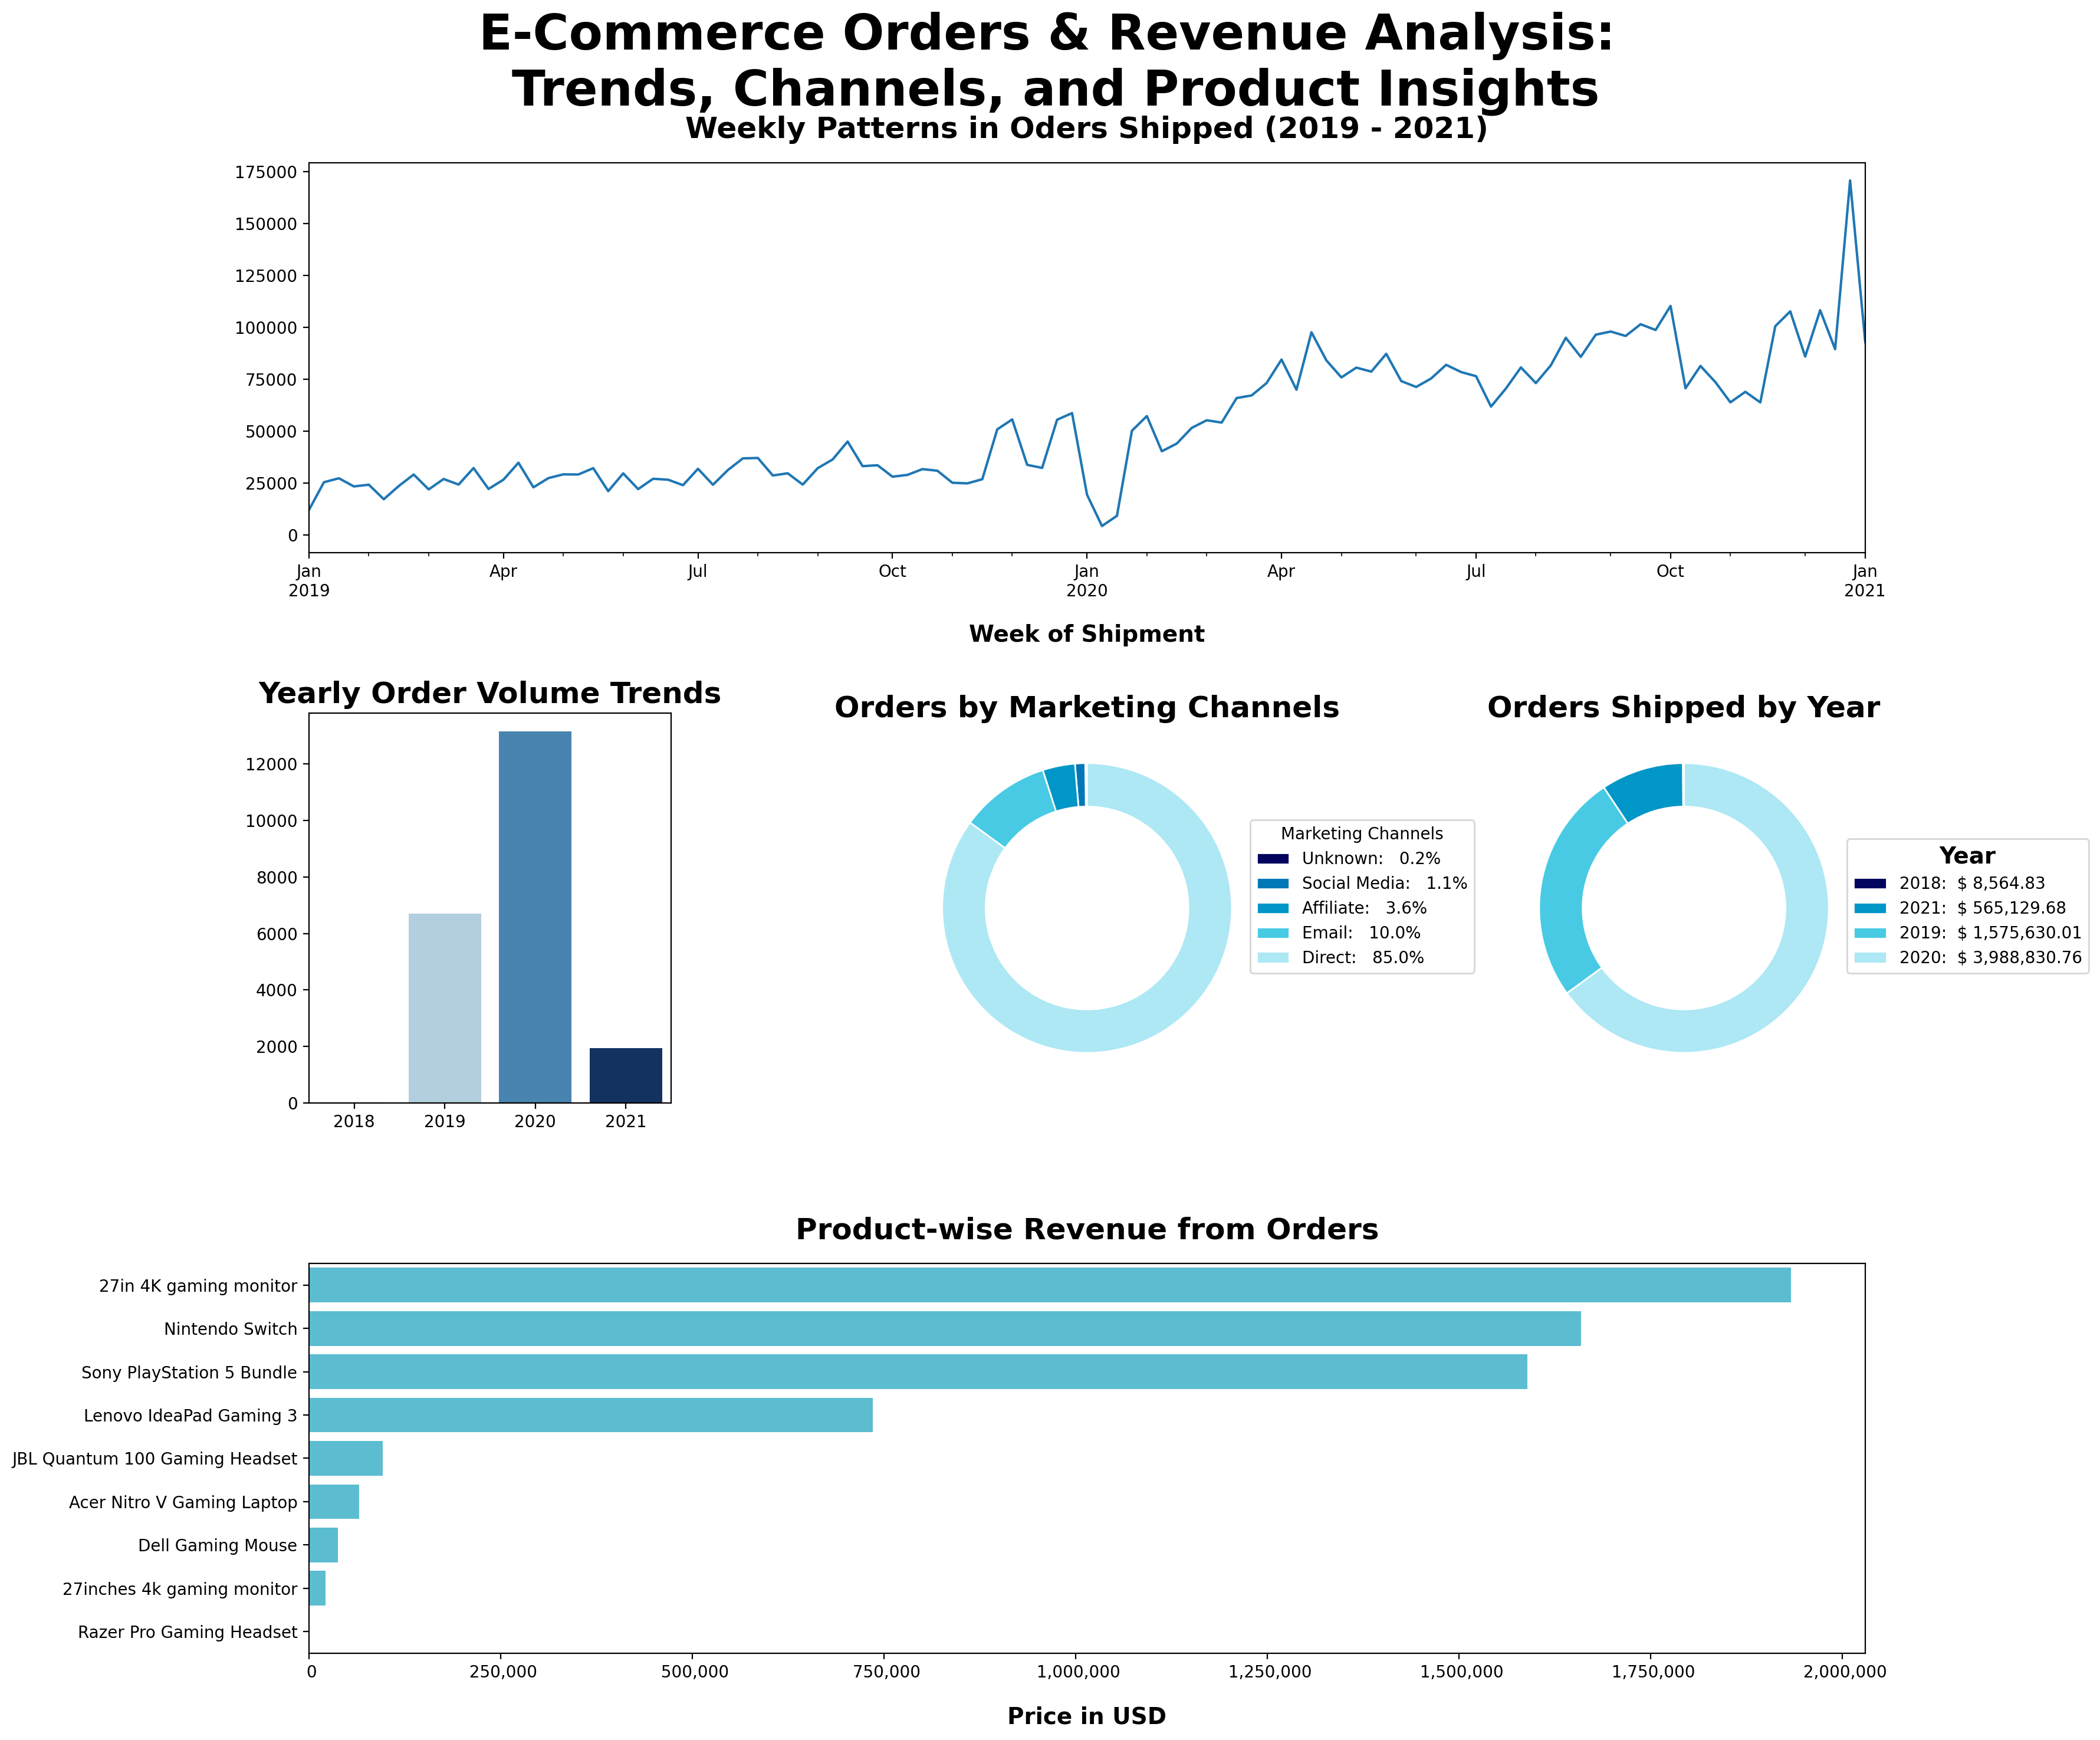

In [441]:
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties

fig = plt.figure(figsize= (18, 15), dpi = 200)
gs = gridspec.GridSpec(3,3)


# Weekly Orders Trend Analysis - Line Plot
ax1 = fig.add_subplot(gs[0,:])
ax1 = weekly_sales.plot();
ax1.set_xlim('2019-01-01', '2020-12-31')
ax1.set_title('Weekly Patterns in Oders Shipped (2019 - 2021)', fontsize = 18, weight = 'bold', pad = 15)
ax1.set_xlabel('Week of Shipment', fontsize = 14, weight = 'bold', labelpad = 15);

pos = ax1.get_position()               # Get current position
ax1.set_position([pos.x0 - 0.02, pos.y0, pos.width, pos.height])


# Yearly Order Volume Trends - Countplot
ax2 = fig.add_subplot(gs[1,0])
sns.barplot(
    x=orders_count_by_year.index,
    y = orders_count_by_year.values,
    hue = orders_count_by_year.index,
    palette = 'Blues', legend=False
);

ax2.set_xlabel('')
ax2.set_title('Yearly Order Volume Trends', fontsize = 18, weight = 'bold')
pos = ax2.get_position()               # Get current position
ax2.set_position([pos.x0 - 0.02, pos.y0, pos.width, pos.height])


# Orders by Marketing Channels - Do-nut Chart 1
ax3 = fig.add_subplot(gs[1,1])
ax3.pie(
    sales_by_channel,
    startangle= 90,
    colors = reversed(['#ade8f4', '#48cae4', '#0096c7', '#0077b6', '#03045e']),
    wedgeprops = dict(width = 0.3, edgecolor = 'w'),
    pctdistance = 0.85
)

pos = ax3.get_position()               # Get current position
ax3.set_position([pos.x0 - 0.02, pos.y0, pos.width, pos.height])

ax3.set_title('Orders by Marketing Channels', fontsize = 18, weight = 'bold')
total = sum(sales_by_channel)

ax3.legend(
    labels = [f"{label}:  {value/total: .1%}" for label, value in zip(sales_by_channel.index, sales_by_channel.values)],
    loc = (0.95,0.32),
    title = 'Marketing Channels',
);


# Orders Shipped by Year - Do-nut Chart 2
ax4 = fig.add_subplot(gs[1,2])
ax4.pie(
    orders_shipped_by_year,
    colors = ['#03045e', '#0096c7', '#48cae4', '#ade8f4'],
    startangle=90,
    wedgeprops=dict(width = 0.3, edgecolor = 'w'),
    pctdistance=0.85    
)

ax4.set_title('Orders Shipped by Year', fontsize = 18, weight = 'bold')
ax4.legend(
    title = "Year",
    labels=[f"{i}:  ${v: ,}" for i,v in zip(orders_shipped_by_year.index, orders_shipped_by_year.values)],
    loc = (0.95, 0.32),
    title_fontproperties = FontProperties(weight = 'bold', size = 14)
);


# Product-wise Revenue from Orders
ax5 = fig.add_subplot(gs[2,:])
sns.barplot(
    data = total_sales_by_products, 
    x = 'USD_PRICE',
    y = 'PRODUCT_NAME',
    color='#48cae4', 
    ax = ax5
)

ax5.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_ : f'{int(x): ,}'))
ax5.set_title('Product-wise Revenue from Orders', fontsize = 18, weight = 'bold', pad = 15)
ax5.set_xlabel('Price in USD', fontsize = 14, weight = 'bold', labelpad = 15)
ax5.set_ylabel('')

plt.suptitle('E-Commerce Orders & Revenue Analysis: \nTrends, Channels, and Product Insights', fontsize = 30, weight = 'bold', y = 0.98)

plt.subplots_adjust(wspace=1, hspace=3, left = 0.1, right = 0.45, top = 0.9)
plt.tight_layout()

plt.savefig('E-Commerce_Orders_&_Revenue_Analysis.png')
plt.show()